In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [3]:
import pathlib

In [4]:
data_dir = pathlib.Path(data_dir)

In [5]:
data_dir

WindowsPath('datasets/flower_photos')

In [6]:
len(list(data_dir.glob("*/*.jpg")))

3670

In [7]:
roses = list(data_dir.glob("roses/*.jpg"))

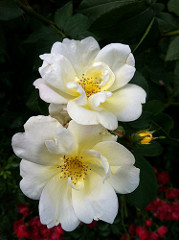

In [8]:
PIL.Image.open(str(roses[0]))

In [9]:
flowers_images_dict = {
    "roses": list(data_dir.glob("roses/*.jpg")),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [10]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [11]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [12]:
img.shape

(240, 179, 3)

In [13]:
cv2.resize(img, (180, 180)).shape

(180, 180, 3)

In [14]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [15]:
X = np.array(X)
y = np.array(y)

In [16]:
X.shape

(3670, 180, 180, 3)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [18]:

X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [19]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30) 

Epoch 1/30
86/86 [==============================] - 18s 200ms/step - loss: 1.1862 - accuracy: 0.5073
Epoch 2/30
86/86 [==============================] - 18s 213ms/step - loss: 0.9380 - accuracy: 0.6294
Epoch 3/30
86/86 [==============================] - 17s 202ms/step - loss: 0.7314 - accuracy: 0.7242
Epoch 4/30
86/86 [==============================] - 17s 200ms/step - loss: 0.5569 - accuracy: 0.7936
Epoch 5/30
86/86 [==============================] - 19s 218ms/step - loss: 0.3557 - accuracy: 0.8765
Epoch 6/30
86/86 [==============================] - 18s 205ms/step - loss: 0.1794 - accuracy: 0.9459
Epoch 7/30
86/86 [==============================] - 18s 206ms/step - loss: 0.0974 - accuracy: 0.9698
Epoch 8/30
86/86 [==============================] - 17s 198ms/step - loss: 0.0633 - accuracy: 0.9833
Epoch 9/30
86/86 [==============================] - 18s 205ms/step - loss: 0.0471 - accuracy: 0.9884
Epoch 10/30
86/86 [==============================] - 18s 214ms/step - loss: 0.0376 - accura

In [20]:
model.evaluate(X_test, y_test)

29/29 [==============================] - 1s 43ms/step - loss: 653.2580 - accuracy: 0.6111


[653.2579956054688, 0.6111111044883728]

In [21]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 1s 42ms/step


array([[  3.401985  ,  18.74958   ,   1.9746684 , -18.185474  ,
         -8.474554  ],
       [ 11.321561  ,  -5.7461085 , -11.163514  ,  -3.238549  ,
          6.884674  ],
       [ -3.536193  ,   4.3499227 ,  14.53002   , -11.769415  ,
         -6.824818  ],
       ...,
       [ -2.168522  ,  -8.690253  ,  -8.363853  ,  12.834015  ,
         -0.39007685],
       [  7.041817  ,  -0.9885489 ,   3.6466584 ,  -7.100408  ,
         -1.8481957 ],
       [ -2.1672552 , -15.822857  ,  -1.7016671 ,   8.98184   ,
          3.7933748 ]], dtype=float32)

In [22]:
score = tf.nn.softmax(predictions[0])

In [23]:
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([2.1608467e-07, 9.9999976e-01, 5.1849938e-08, 9.1056181e-17,
       1.5021335e-12], dtype=float32)>

In [24]:
y_test[0]

1

In [25]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

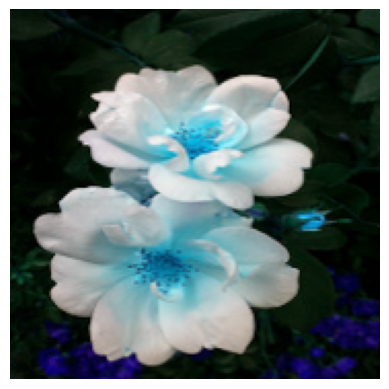

In [26]:
plt.axis('off')
plt.imshow(X[0])

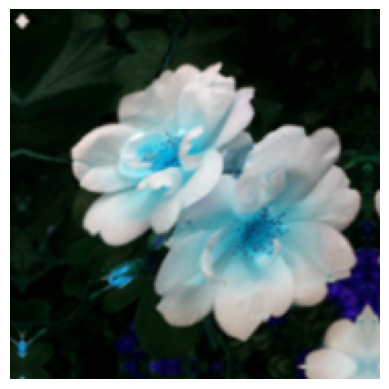

In [27]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [28]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=12)    

Epoch 1/12
86/86 [==============================] - 25s 283ms/step - loss: 1.4121 - accuracy: 0.3706
Epoch 2/12
86/86 [==============================] - 23s 267ms/step - loss: 1.0550 - accuracy: 0.5767
Epoch 3/12
86/86 [==============================] - 23s 272ms/step - loss: 0.9615 - accuracy: 0.6254
Epoch 4/12
86/86 [==============================] - 23s 268ms/step - loss: 0.9125 - accuracy: 0.6341
Epoch 5/12
86/86 [==============================] - 23s 269ms/step - loss: 0.8657 - accuracy: 0.6653
Epoch 6/12
86/86 [==============================] - 23s 262ms/step - loss: 0.7905 - accuracy: 0.6944
Epoch 7/12
86/86 [==============================] - 23s 271ms/step - loss: 0.7556 - accuracy: 0.7122
Epoch 8/12
86/86 [==============================] - 23s 266ms/step - loss: 0.7340 - accuracy: 0.7137
Epoch 9/12
86/86 [==============================] - 23s 269ms/step - loss: 0.7001 - accuracy: 0.7188
Epoch 10/12
86/86 [==============================] - 22s 253ms/step - loss: 0.6553 - accura

In [29]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 42ms/step - loss: 0.7917 - accuracy: 0.6993


[0.7916807532310486, 0.6993464231491089]